# Preprocessing Data

Nama : Rahma Metrikasari
NRP  : 06211640000054


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# memanggil data excel pada sheet 2
data = pd.read_excel('data latihan.xlsx',sheet=2)

In [5]:
#menampilkan data
data.head(50)
data.tail(50)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,type
250,61,Private,69867,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
251,17,Private,191260,9th,5,Never-married,Other-service,Own-child,White,Male,1055,0,24,United-States,<=50K
252,50,Self-emp-not-inc,30653,Masters,14,Married-civ-spouse,Farming-fishing,Husband,White,Male,2407,0,98,United-States,<=50K
253,27,Local-gov,209109,Masters,14,Never-married,Prof-specialty,Own-child,White,Male,0,0,35,United-States,<=50K
254,30,Private,70377,HS-grad,9,Divorced,Prof-specialty,Own-child,White,Female,0,0,40,United-States,<=50K
255,43,Private,477983,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
256,44,Private,170924,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,7298,0,40,United-States,>50K
257,35,Private,190174,Some-college,10,Never-married,Exec-managerial,Not-in-family,White,Female,0,0,40,United-States,<=50K
258,25,Private,193787,Some-college,10,Never-married,Tech-support,Own-child,White,Female,0,0,40,United-States,<=50K
259,24,Private,279472,Some-college,10,Married-civ-spouse,Machine-op-inspct,Wife,White,Female,7298,0,48,United-States,>50K


In [4]:
# mencari info data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 15 columns):
age               300 non-null int64
workclass         300 non-null object
fnlwgt            300 non-null int64
education         300 non-null object
education-num     300 non-null int64
marital-status    300 non-null object
occupation        300 non-null object
relationship      300 non-null object
race              300 non-null object
sex               300 non-null object
capital-gain      300 non-null int64
capital-loss      300 non-null int64
hours-per-week    300 non-null int64
native-country    300 non-null object
type              300 non-null object
dtypes: int64(6), object(9)
memory usage: 35.2+ KB


In [6]:
# mengetahui jumlah missing value
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
type              0
dtype: int64

In [16]:
# mengganti ? dengan NA
data = data.replace(" ?", np.nan)

In [17]:
data.isnull().sum()

age                0
workclass         16
fnlwgt             0
education          0
education-num      0
marital-status     0
occupation        16
relationship       0
race               0
sex                0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     7
type               0
dtype: int64

In [23]:
Y = ['type']
X_int = ['age','fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
X_cat = ['workclass', 'education', 'marital-status', 'occupation', 'relationship','race','sex','native-country']


In [24]:
data_Y = data[Y]
data_int = data[X_int].astype(float)
data_cat = data[X_cat]

In [25]:
# mengganti missing data
data_int_array = []
data_cat_array = []
for class_name in data_Y['type'].unique():
    data_int_1 = data_int[data_Y['type']==class_name]
    data_int_clean_1 = data_int_1.fillna(data_int_1.mean().astype(int))
    data_int_array.append(data_int_clean_1)
    
    data_cat_1 = data_cat[data_Y['type']==class_name]
    data_cat_clean_1 = data_cat_1.where(pd.notnull(data_cat_1), data_cat_1.mode(), axis='columns')
    data_cat_array.append(data_cat_clean_1)

In [26]:
data_int_clean = pd.concat(data_int_array)
data_cat_clean = pd.concat(data_cat_array)

In [28]:
data_int_clean.isnull().sum()
data_cat_clean.isnull().sum()

workclass         0
education         0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
native-country    0
dtype: int64

# Standardize

In [30]:
from sklearn.preprocessing import StandardScaler

In [35]:
data_new = pd.concat([data_int_clean,data_cat_clean,data_Y], axis=1)
data_new.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass,education,marital-status,occupation,relationship,race,sex,native-country,type
0,39.0,77516.0,13.0,2174.0,0.0,40.0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,50.0,83311.0,13.0,0.0,0.0,13.0,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,38.0,215646.0,9.0,0.0,0.0,40.0,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,53.0,234721.0,7.0,0.0,0.0,40.0,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,28.0,338409.0,13.0,0.0,0.0,40.0,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


In [37]:
data_new['fnlwgt'] = StandardScaler().fit(data_new[['fnlwgt']]).transform(data_new[['fnlwgt']])
data_new['education-num'] = StandardScaler().fit(data_new[['education-num']]).transform(data_new[['education-num']])
data_new['capital-gain'] = StandardScaler().fit(data_new[['capital-gain']]).transform(data_new[['capital-gain']])
data_new['capital-loss'] = StandardScaler().fit(data_new[['capital-loss']]).transform(data_new[['capital-loss']])
data_new['hours-per-week'] = StandardScaler().fit(data_new[['hours-per-week']]).transform(data_new[['hours-per-week']])
data_new.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass,education,marital-status,occupation,relationship,race,sex,native-country,type
0,39.0,-1.015296,1.038927,0.470404,-0.242928,-0.024961,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,50.0,-0.964467,1.038927,-0.235074,-0.242928,-2.322516,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,38.0,0.196283,-0.452356,-0.235074,-0.242928,-0.024961,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,53.0,0.363595,-1.197997,-0.235074,-0.242928,-0.024961,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,28.0,1.273073,1.038927,-0.235074,-0.242928,-0.024961,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


# Deteksi Outlier

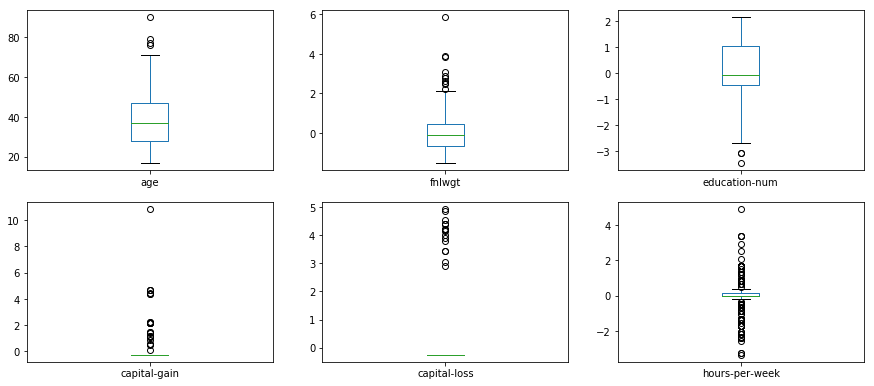

In [40]:
plt.rcParams['figure.figsize'] = (15.0, 10.0)
data_new.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
plt.show()

In [44]:
colors_palette = {' <=50K': "red",  ' >50K': "blue"}
colors = [colors_palette[c] for c in data_new['type']]   

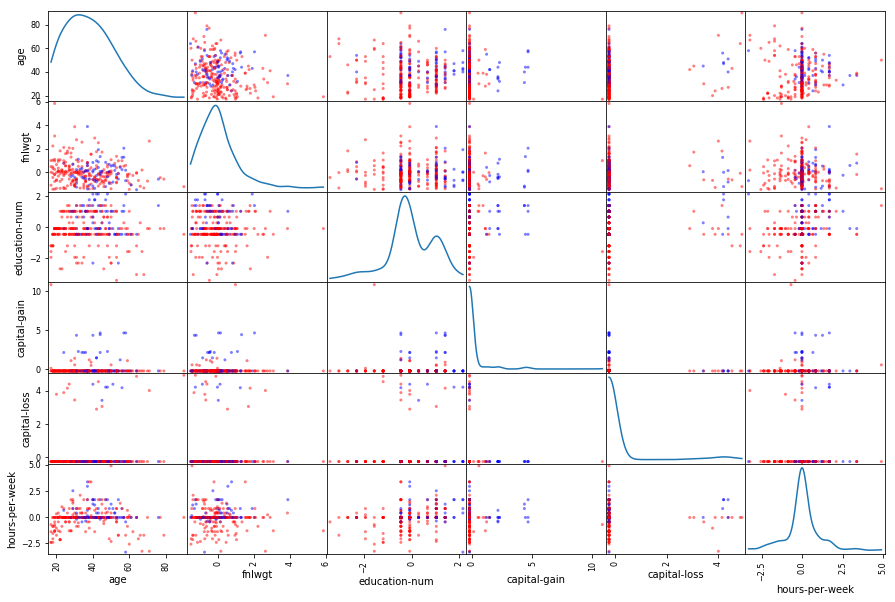

In [46]:
from pandas.plotting import scatter_matrix
scatter_matrix(data_new, color=colors, diagonal='kde')
plt.show()

In [51]:
data_new.to_excel('data latihan baru.xlsx',index=0)